<a href="https://colab.research.google.com/github/kartiksingh0/100days-of-machine-learning/blob/main/standardiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads (2).csv')

In [3]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
df =df.iloc[:,2:]

In [5]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [8]:
from sklearn.model_selection import  train_test_split
X = df.drop('Purchased',axis= 1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_test.shape, X_train.shape


((132, 2), (268, 2))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train.head(2)

,Age,EstimatedSalary
258,58,95000
177,25,22000


In [30]:
X_train_scaled

array([[ 2.0052225 ,  0.72479792],
       [-1.22740379, -1.43119212],
       [ 0.33993017, -0.33843005],
       [-0.93352867,  0.54759326],
       [ 0.43788855,  0.28178627],
       [ 0.43788855,  1.10874135],
       [ 0.82972204,  0.75433203],
       [ 0.92768041,  1.2564119 ],
       [-0.44373681, -1.25398746],
       [-1.81515402, -1.34258979],
       [ 1.12359715,  0.54759326],
       [-0.63965355, -1.63793089],
       [-0.73761192,  0.25225216],
       [ 1.02563878,  2.08336699],
       [-0.54169518,  1.37454834],
       [-0.05190332,  0.01597928],
       [-1.91311239,  0.45899093],
       [ 0.43788855,  0.25225216],
       [-1.03148704,  0.39992271],
       [ 0.2419718 , -0.16122538],
       [ 1.90726413,  0.10458161],
       [-1.12944541, -1.63793089],
       [-1.12944541,  0.28178627],
       [-0.8355703 , -0.81097581],
       [-0.44373681,  2.31963987],
       [ 0.14401343, -0.84050992],
       [ 1.61338901,  0.99060491],
       [-0.14986169, -1.10631691],
       [ 0.82972204,

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [32]:
X_train_scaled

,Age,EstimatedSalary
0,2.005223,0.724798
1,-1.227404,-1.431192
2,0.339930,-0.338430
3,-0.933529,0.547593
4,0.437889,0.281786
...,...,...
263,-1.325362,-1.283522
264,-1.129445,-1.047249
265,0.535847,1.847094
266,0.144013,0.193184


In [33]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,268.0,268.0
mean,37.5,70459.0
std,10.2,33922.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [34]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,268.0,268.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After scaling')

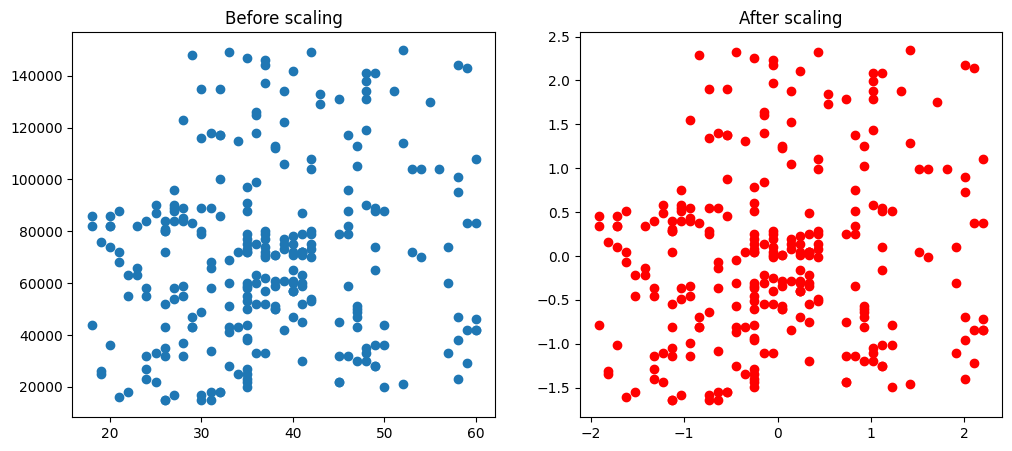

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols= 2,figsize =(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title('After scaling')

**#Why scaling is important**

In [47]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()


lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [48]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test, y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8333333333333334
scaled 0.8409090909090909
